In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Loading Data

In [144]:
# movies = pd.read_csv('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/miniprojects/miniproject2/data/movies.csv')
# data = pd.read_csv('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/miniprojects/miniproject2/data/data.csv')

movies = pd.read_csv('data/movies.csv')
data = pd.read_csv('data/data.csv')

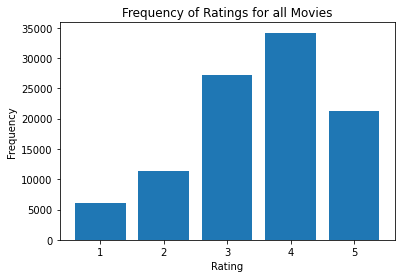

In [101]:
ratings = data['Rating']
labels = list(range(1, 6, 1))
freq = [ratings[ratings == i].count() for i in labels]
plt.bar(labels, freq)
# plt.xticks(np.arange(1, 6, 1))

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Frequency of Ratings for all Movies')
plt.show()


[50, 258, 100, 181, 294, 286, 288, 1, 300, 121]
{'English Patient, The (1996)', 'Air Force One (1997)', 'Return of the Jedi (1983)', 'Star Wars (1977)', 'Toy Story (1995)', 'Liar Liar (1997)', 'Fargo (1996)', 'Contact (1997)', 'Independence Day (ID4) (1996)', 'Scream (1996)'}


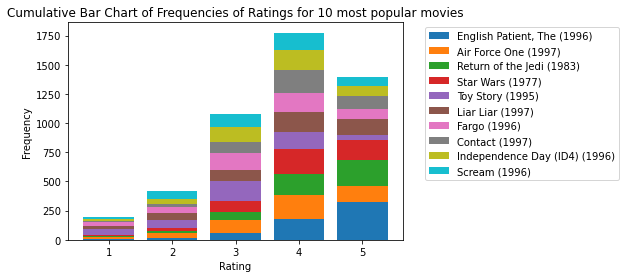

In [160]:
top_ten = data.value_counts(subset=['Movie ID'])[:10]

ids = []
for element in list(top_ten.keys()):
    ids.append(element[0])
print(ids)

i = 0
titles = set()
for movie in range(len(movies)):
    if movies['Movie ID'][movie] in ids:
        titles.add(movies['Movie Title'][movie])

print(titles)
bottom = [0, 0, 0, 0, 0]
prev_bottom = []

for j in range(0, 10):
    labels = list(range(1, 6, 1))
    freq = [0, 0, 0, 0, 0]
    prev_bottom = bottom.copy()
    for i in range(len(data)):
        if data['Movie ID'][i] == (ids[j]):
            freq[data['Rating'][i]-1] += 1
            bottom[data['Rating'][i]-1] += 1
    plt.bar(labels, freq, bottom=prev_bottom)

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Cumulative Bar Chart of Frequencies of Ratings for 10 most popular movies')
plt.legend(titles, bbox_to_anchor=(1.05, 1))
plt.show()

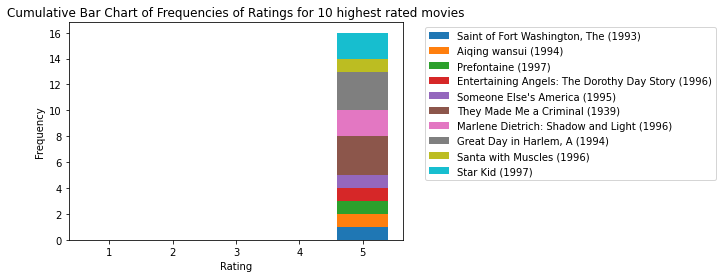

In [165]:
id_rating = data[['Movie ID', 'Rating']]
avg_ratings = id_rating.groupby(['Movie ID'], as_index=False).mean()
avg_ratings = avg_ratings.sort_values(by=['Rating'], ascending=False)[:10]
ids = list(avg_ratings['Movie ID'])
avg_ratings = avg_ratings['Rating']

#TODO: Check that information is correct

i = 0
titles = set()
for movie in range(len(movies)):
    if movies['Movie ID'][movie] in ids:
        titles.add(movies['Movie Title'][movie])

bottom = [0, 0, 0, 0, 0]
prev_bottom = []

for j in range(0, 10):
    labels = list(range(1, 6, 1))
    freq = [0, 0, 0, 0, 0]
    prev_bottom = bottom.copy()
    for i in range(len(data)):
        if data['Movie ID'][i] == (ids[j]):
            freq[data['Rating'][i]-1] += 1
            bottom[data['Rating'][i]-1] += 1
    plt.bar(labels, freq, bottom=prev_bottom)

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Cumulative Bar Chart of Frequencies of Ratings for 10 highest rated movies')
plt.legend(titles, bbox_to_anchor=(1.05, 1))
plt.show()
